### 直径

In [2]:
import networkx as nx
G1=nx.barabasi_albert_graph(1000,3)
print("网络直径为：",nx.diameter(G1))

网络直径为： 6


In [3]:
# 指定节点对i和j之间的效率，前提是这俩个节点之间要有路径
print(nx.efficiency(G1,1,5))
print(nx.shortest_path_length(G1,1,5))

0.5
2


In [4]:
# 局部效率
print(nx.local_efficiency(G1))

0.03102388353501494


In [5]:
# 全局效率
print(nx.global_efficiency(G1))

0.3021117450792804


In [6]:
# 整个网络的平均距离
print(nx.average_shortest_path_length(G1))

3.501411411411411


### 节点介数

In [7]:
BA=nx.barabasi_albert_graph(20,2)
bc=nx.betweenness_centrality(BA)
print(bc)

{0: 0.16306042884990254, 1: 0.0, 2: 0.13031189083820663, 3: 0.38508771929824553, 4: 0.20175438596491224, 5: 0.16335282651072122, 6: 0.030799220272904482, 7: 0.03450292397660819, 8: 0.18762183235867444, 9: 0.019200779727095513, 10: 0.0, 11: 0.018518518518518517, 12: 0.0031189083820662767, 13: 0.016764132553606235, 14: 0.035769980506822605, 15: 0.0, 16: 0.0, 17: 0.0, 18: 0.0, 19: 0.007797270955165692}


3


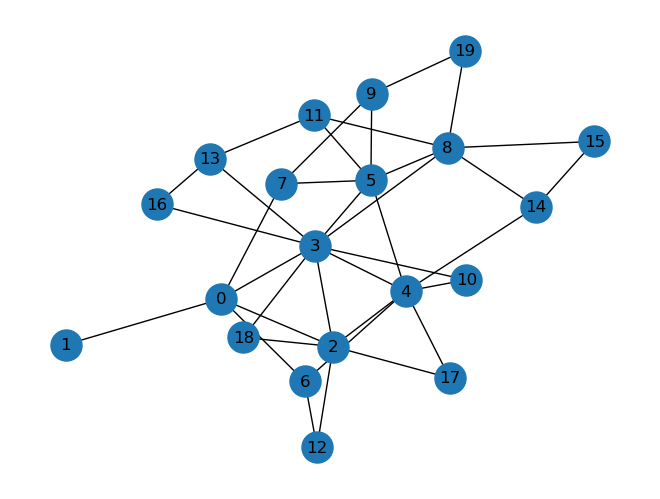

In [8]:
# 获取介数最大的节点标签
max_id=max(bc,key=bc.get)
print(max_id)
# 绘制网络
nx.draw(BA,node_size=500,with_labels=True)

### 边介数

In [9]:
ebc=nx.edge_betweenness_centrality(BA)
print(ebc)

{(0, 1): 0.09999999999999999, (0, 2): 0.055614035087719296, (0, 3): 0.11728070175438596, (0, 6): 0.048333333333333325, (0, 7): 0.07228070175438596, (2, 3): 0.08596491228070174, (2, 4): 0.04745614035087719, (2, 12): 0.07596491228070175, (2, 17): 0.039210526315789467, (2, 18): 0.030350877192982455, (3, 4): 0.057807017543859654, (3, 5): 0.07491228070175437, (3, 8): 0.15359649122807018, (3, 10): 0.06184210526315789, (3, 13): 0.08263157894736842, (3, 16): 0.08947368421052632, (3, 18): 0.06964912280701754, (4, 5): 0.09228070175438595, (4, 6): 0.07745614035087717, (4, 10): 0.0381578947368421, (4, 14): 0.08921052631578946, (4, 17): 0.06078947368421053, (5, 7): 0.05614035087719298, (5, 8): 0.043596491228070175, (5, 9): 0.07131578947368421, (5, 11): 0.05578947368421052, (6, 12): 0.02964912280701754, (7, 9): 0.03368421052631579, (8, 11): 0.04052631578947368, (8, 14): 0.045350877192982454, (8, 15): 0.07017543859649122, (8, 19): 0.08447368421052631, (9, 19): 0.029561403508771927, (11, 13): 0.037017

### 核度

In [10]:
ks=nx.core_number(BA)
print(ks)

{0: 2, 1: 1, 2: 2, 3: 2, 4: 2, 5: 2, 6: 2, 7: 2, 8: 2, 9: 2, 10: 2, 11: 2, 12: 2, 13: 2, 14: 2, 15: 2, 16: 2, 17: 2, 18: 2, 19: 2}


{0: 4, 1: 4, 2: 4, 3: 4, 4: 3, 5: 3, 6: 3, 7: 4, 8: 4, 9: 2, 10: 3, 11: 1, 12: 2, 13: 4, 14: 2, 15: 2, 16: 2, 17: 2, 18: 2, 19: 3, 20: 2, 21: 2, 22: 2, 23: 3, 24: 3, 25: 3, 26: 2, 27: 3, 28: 3, 29: 3, 30: 4, 31: 3, 32: 4, 33: 4}
0


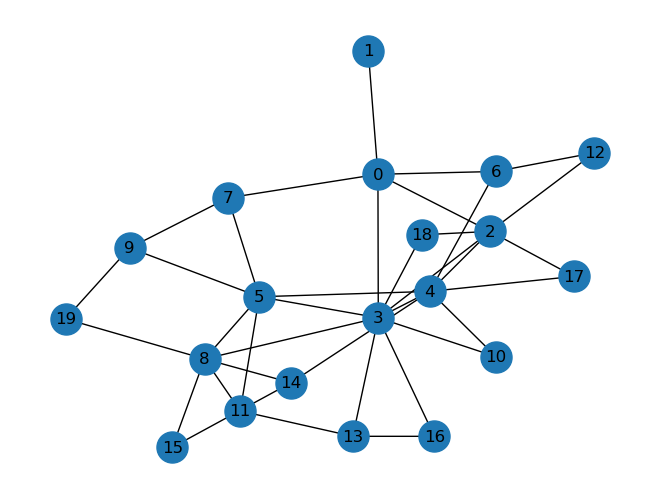

In [11]:
# 换一个网络试试
kcg=nx.karate_club_graph()
ks=nx.core_number(kcg)
print(ks)
# 获取核度最大的节点标签
max_id=max(ks,key=ks.get)
print(max_id)
nx.draw(BA,node_size=500,with_labels=True)

### 网络密度

In [12]:
print(nx.density(kcg))

0.13903743315508021


### 几种常见的中心性指标

In [13]:
# 分别生成ER和BA无标度网络,节点数设定为N=100
GER=nx.erdos_renyi_graph(100,0.08)
GBA=nx.barabasi_albert_graph(100,4)

In [14]:
# 度中心性
dc1=nx.degree_centrality(GER)
dc2=nx.degree_centrality(GBA)
# 介数中心性
bc1=nx.betweenness_centrality(GER)
bc2=nx.betweenness_centrality(GBA)
# 接近度中心性
cc1=nx.closeness_centrality(GER)
cc2=nx.closeness_centrality(GBA)
# 特征向量中心性
ec1=nx.eigenvector_centrality(GER)
ec2=nx.eigenvector_centrality(GBA)

Text(0.5, 1.0, 'eigenvector_centrality')

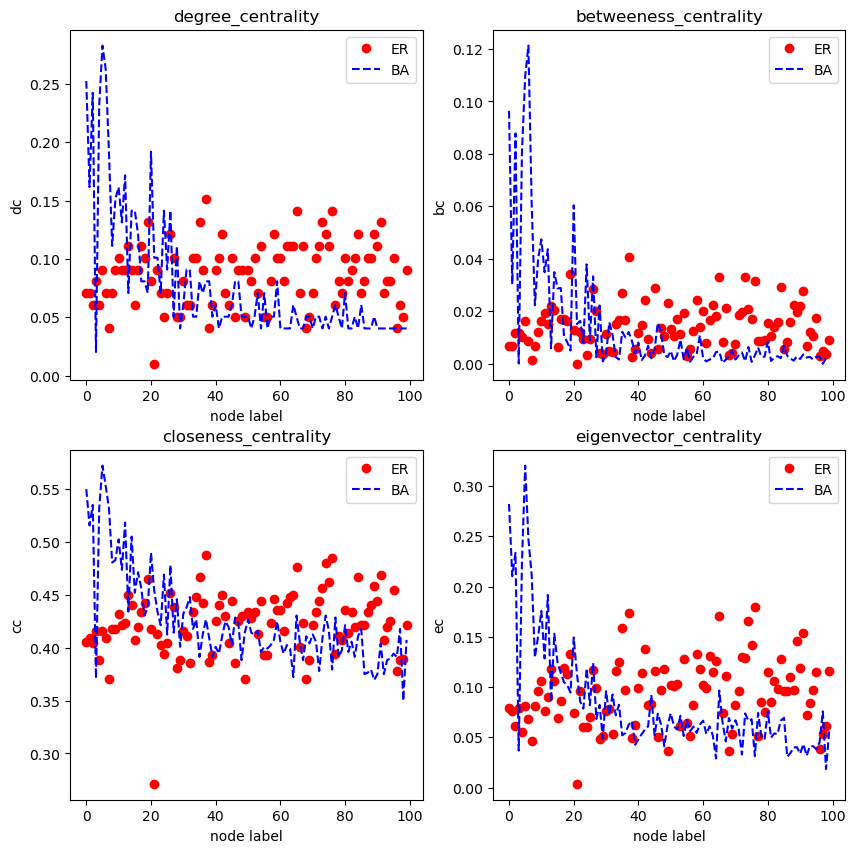

In [18]:
import matplotlib.pyplot as plt
# 绘图比较
plt.figure(figsize=(10,10))

plt.subplot(221)
plt.plot(dc1.keys(),dc1.values(),'ro',label='ER')
plt.plot(dc2.keys(),dc2.values(),'b--',label='BA')
plt.legend(loc=0)
plt.xlabel("node label")
plt.ylabel("dc")
plt.title("degree_centrality")

plt.subplot(222)
plt.plot(bc1.keys(),bc1.values(),'ro',label='ER')
plt.plot(bc2.keys(),bc2.values(),'b--',label='BA')
plt.legend(loc=0)
plt.xlabel("node label")
plt.ylabel("bc")
plt.title("betweeness_centrality")

plt.subplot(223)
plt.plot(cc1.keys(),cc1.values(),'ro',label='ER')
plt.plot(cc2.keys(),cc2.values(),'b--',label='BA')
plt.legend(loc=0)
plt.xlabel("node label")
plt.ylabel("cc")
plt.title("closeness_centrality")

plt.subplot(224)
plt.plot(ec1.keys(),ec1.values(),'ro',label='ER')
plt.plot(ec2.keys(),ec2.values(),'b--',label='BA')
plt.legend(loc=0)
plt.xlabel("node label")
plt.ylabel("ec")
plt.title("eigenvector_centrality")